# 🌤 Solar Data Analysis and prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial import distance

In [2]:
# lets read the dataset
data = pd.read_csv("solar_data_copy_10%.csv")

In [3]:
data.head()

Timestamp   Air_Temp  Relative_Humidity  Wind_Speed  Wind_Direction  \
0  27-04-2022 15:32  43.349172          12.790256    0.533333      118.786620   
1  27-04-2022 15:34  43.433980          11.468986    1.866667       84.681408   
2  27-04-2022 15:36  43.286580          11.047298    2.866667       40.807156   
3  27-04-2022 15:38  43.523020          12.058292    0.000000       66.390848   
4  27-04-2022 15:40  43.728656          10.722330    2.266667        2.127408   

   Solar_Radiation       RTD_1      RTD_2      RTD_3      RTD_4      RTD_5  \
0        707.53384   98.289640  94.283552  89.002824  93.334288  94.142984   
1        710.46328   98.377480  94.177872  89.334664  93.633208  94.107592   
2        695.51016   97.868064  93.703480  88.844592  92.982568  93.650656   
3        696.24472  101.470960  97.112320  91.963472  96.146384  97.147776   
4        674.05752  101.664240  97.253520  91.980872  96.110968  97.341296   

   Array_Voltage  Array_Current  Power_Generated  
0      80.178232       5.364869        430.14572  
1      80.266728       5.366041        430.71452  
2      80.187416       5.365501        430.24568  
3      80.727760       5.364512        433.06504  
4      80.500312       5.365144        431.89576

In [4]:
data.shape

(1009, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1009 non-null   object 
 1   Air_Temp           1009 non-null   float64
 2   Relative_Humidity  1009 non-null   float64
 3   Wind_Speed         1009 non-null   float64
 4   Wind_Direction     1009 non-null   float64
 5   Solar_Radiation    1009 non-null   float64
 6   RTD_1              1009 non-null   float64
 7   RTD_2              1009 non-null   float64
 8   RTD_3              1009 non-null   float64
 9   RTD_4              1009 non-null   float64
 10  RTD_5              1009 non-null   float64
 11  Array_Voltage      1009 non-null   float64
 12  Array_Current      1009 non-null   float64
 13  Power_Generated    1009 non-null   float64
dtypes: float64(13), object(1)
memory usage: 110.5+ KB


# Visualizing the Data

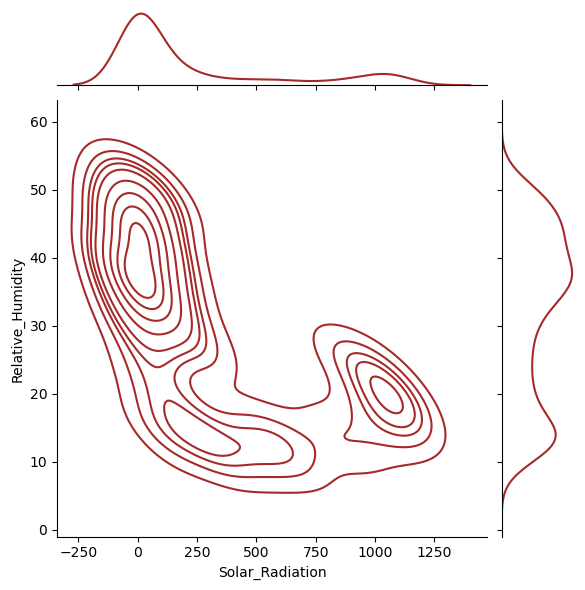

In [6]:
sns.jointplot(x='Solar_Radiation',y='Relative_Humidity',data = data, kind = 'kde' ,color = 'brown')

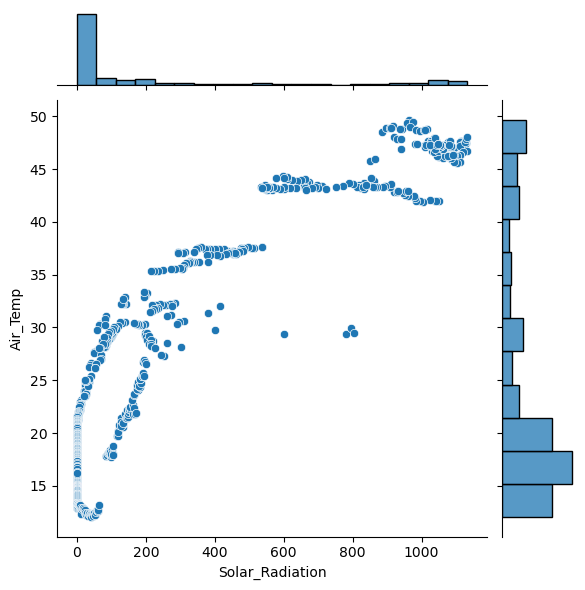

In [7]:
sns.jointplot(x='Solar_Radiation',y='Air_Temp',data = data)

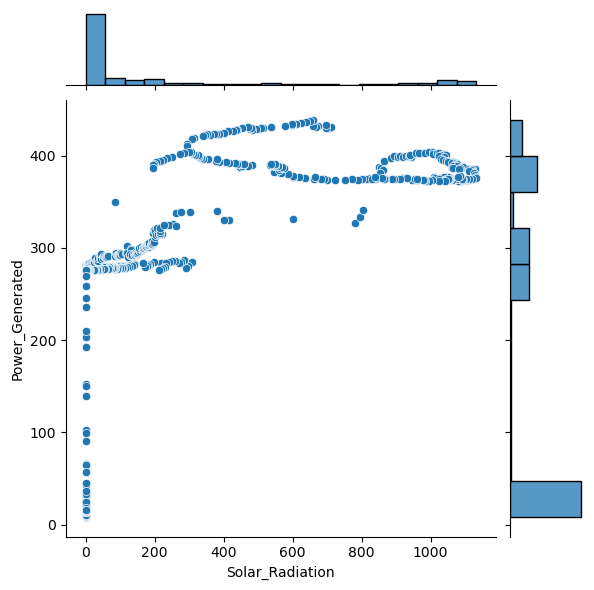

In [8]:
sns.jointplot(x='Solar_Radiation',y='Power_Generated',data = data)

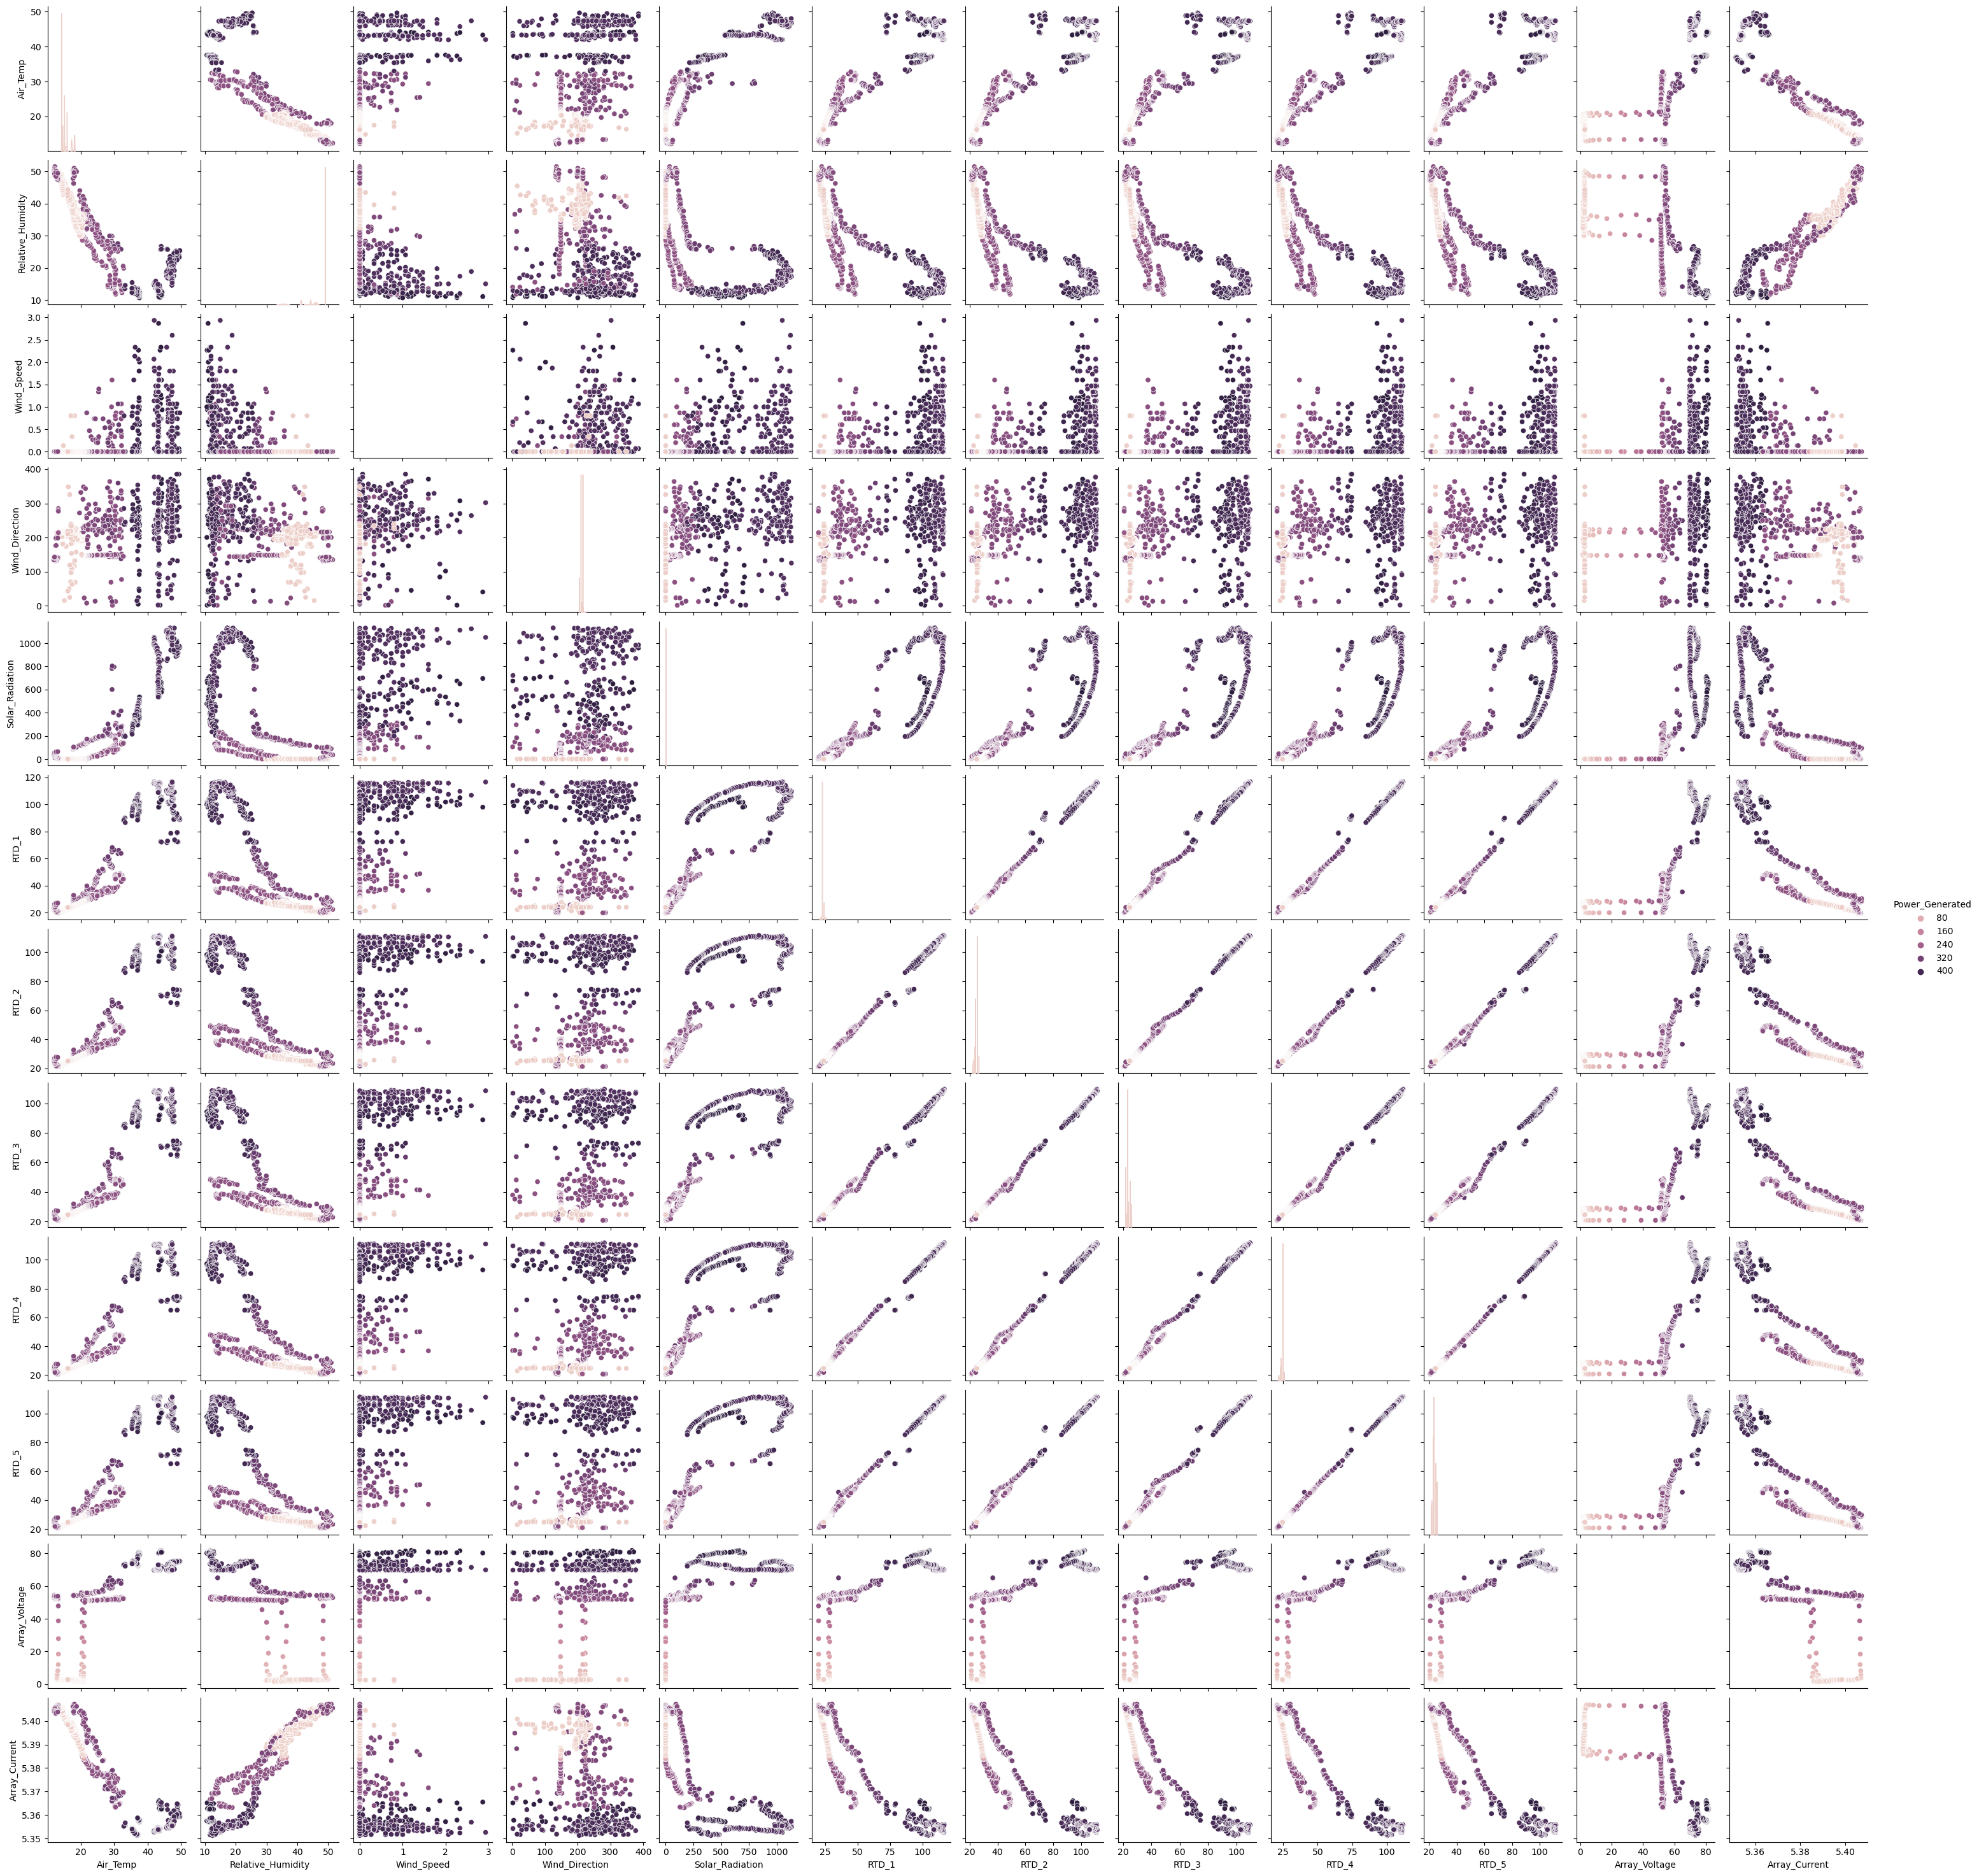

In [9]:
sns.pairplot(data, hue= 'Power_Generated')

In [10]:
# Removing the two columns which is not in need
waste1 = data.pop("Timestamp")
# waste2 = data.pop("Wind_Direction")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1009 non-null   float64
 1   Relative_Humidity  1009 non-null   float64
 2   Wind_Speed         1009 non-null   float64
 3   Wind_Direction     1009 non-null   float64
 4   Solar_Radiation    1009 non-null   float64
 5   RTD_1              1009 non-null   float64
 6   RTD_2              1009 non-null   float64
 7   RTD_3              1009 non-null   float64
 8   RTD_4              1009 non-null   float64
 9   RTD_5              1009 non-null   float64
 10  Array_Voltage      1009 non-null   float64
 11  Array_Current      1009 non-null   float64
 12  Power_Generated    1009 non-null   float64
dtypes: float64(13)
memory usage: 102.6 KB


# Standardizing the data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

numericals = ['Air_Temp','Relative_Humidity','Wind_Speed','Solar_Radiation','RTD_1','RTD_2','RTD_3','RTD_4','RTD_5','Array_Voltage','Array_Current','Power_Generated']

data[numericals] = scaler.fit_transform(data[numericals])

In [13]:
data.head(5)

Air_Temp  Relative_Humidity  Wind_Speed  Wind_Direction  Solar_Radiation  \
0  1.574564          -1.543618    0.814157      118.786620         1.352771   
1  1.581984          -1.650873    3.883984       84.681408         1.360968   
2  1.569087          -1.685103    6.186353       40.807156         1.319129   
3  1.589775          -1.603036   -0.413772       66.390848         1.321185   
4  1.607768          -1.711483    4.804932        2.127408         1.259106   

      RTD_1     RTD_2     RTD_3     RTD_4     RTD_5  Array_Voltage  \
0  1.505487  1.497464  1.411373  1.461600  1.471676       1.486584   
1  1.508074  1.494121  1.422203  1.470963  1.470572       1.489439   
2  1.493074  1.479114  1.406209  1.450584  1.456315       1.486880   
3  1.599161  1.586953  1.507995  1.549679  1.565429       1.504315   
4  1.604852  1.591419  1.508563  1.548570  1.571468       1.496976   

   Array_Current  Power_Generated  
0      -1.019787         1.485977  
1      -0.957215         1.489400  
2      -0.986045         1.486579  
3      -1.038847         1.503541  
4      -1.005105         1.496506

In [15]:
waste2 = data.pop("Wind_Direction")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_Temp           1009 non-null   float64
 1   Relative_Humidity  1009 non-null   float64
 2   Wind_Speed         1009 non-null   float64
 3   Solar_Radiation    1009 non-null   float64
 4   RTD_1              1009 non-null   float64
 5   RTD_2              1009 non-null   float64
 6   RTD_3              1009 non-null   float64
 7   RTD_4              1009 non-null   float64
 8   RTD_5              1009 non-null   float64
 9   Array_Voltage      1009 non-null   float64
 10  Array_Current      1009 non-null   float64
 11  Power_Generated    1009 non-null   float64
dtypes: float64(12)
memory usage: 94.7 KB


# Model Building

In [17]:
Y = data.pop('Power_Generated')

X = data

In [18]:
# spliting the data into train and test 
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [20]:
#  LSTM Model 
import tensorflow as tf

tf.random.set_seed(42)
 
model_1 = tf.keras.Sequential([tf.keras.layers.LSTM(300,activation='relu',return_sequences=True,input_shape=(11,1)),
                               tf.keras.layers.LSTM(200,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = "mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

history_1 = model_1.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=10)

Epoch 1/10
26/26 [==============================] - 9s 75ms/step - loss: 0.9344 - mae: 0.9344
Epoch 2/10
26/26 [==============================] - 2s 75ms/step - loss: 0.6158 - mae: 0.6158
Epoch 3/10
26/26 [==============================] - 2s 78ms/step - loss: 0.2957 - mae: 0.2957
Epoch 4/10
26/26 [==============================] - 2s 89ms/step - loss: 0.2151 - mae: 0.2151
Epoch 5/10
26/26 [==============================] - 2s 76ms/step - loss: 0.1757 - mae: 0.1757
Epoch 6/10
26/26 [==============================] - 2s 73ms/step - loss: 0.1316 - mae: 0.1316
Epoch 7/10
26/26 [==============================] - 2s 74ms/step - loss: 0.1853 - mae: 0.1853
Epoch 8/10
26/26 [==============================] - 2s 76ms/step - loss: 0.1006 - mae: 0.1006
Epoch 9/10
26/26 [==============================] - 2s 75ms/step - loss: 0.0879 - mae: 0.0879
Epoch 10/10
26/26 [==============================] - 2s 75ms/step - loss: 0.0689 - mae: 0.0689


Text(0.5, 0, 'Epochs')

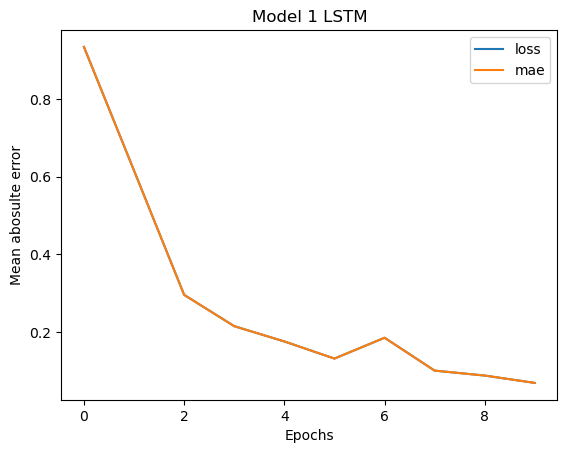

In [21]:
pd.DataFrame(history_1.history).plot()
plt.title("Model 1 LSTM")
plt.ylabel("Mean abosulte error")
plt.xlabel("Epochs")

# Prediction

In [22]:
# Make predictions on the test data
Y_pred = model_1.predict(X_test)

7/7 [==============================] - 1s 34ms/step


In [23]:
# Calculate prediction errors
prediction_errors = np.abs(Y_pred.flatten() - Y_test)

Text(0, 0.5, 'Absolute Prediction Error')

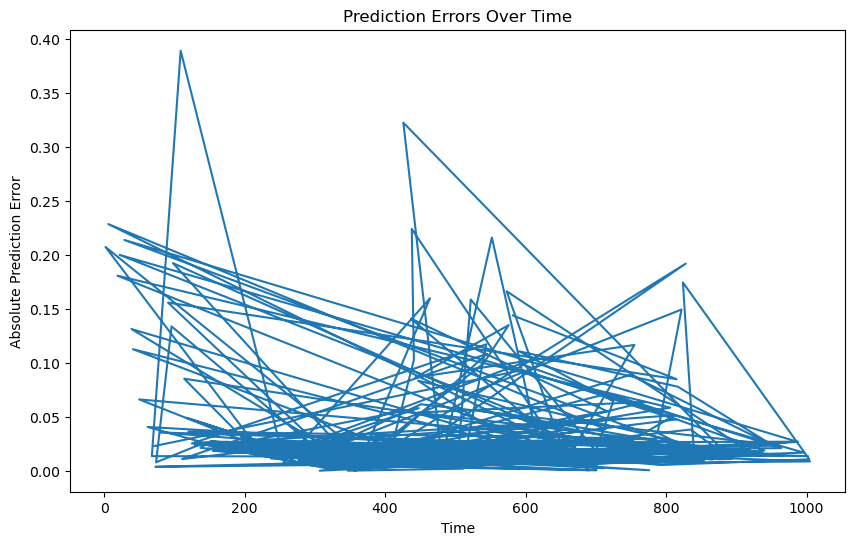

In [24]:
# Visualize prediction errors
plt.figure(figsize=(10, 6))
plt.plot(prediction_errors)
plt.title("Prediction Errors Over Time")
plt.xlabel("Time")
plt.ylabel("Absolute Prediction Error")

In [25]:
# Calculate the Rosenstein Lyapunov exponent
def calculate_lyapunov_exponent(data, embedding_dimension, time_delay):
    n = len(data)
    max_m = n - (embedding_dimension - 1) * time_delay
    max_distance = 0
    
    for t in range(max_m):
        x_t = data[t : t + embedding_dimension * time_delay : time_delay]
        for j in range(t + 1, max_m):
            x_j = data[j : j + embedding_dimension * time_delay : time_delay]
            dist = distance.euclidean(x_t, x_j)
            if dist > max_distance:
                max_distance = dist

    # Calculate the Lyapunov exponent
    return np.log(max_distance) / max_m

# Set the embedding dimension and time delay (you may need to tune these values)
embedding_dimension = 5
time_delay = 1

In [26]:
# Calculate the Lyapunov exponent for prediction errors
lyapunov_exponent = calculate_lyapunov_exponent(prediction_errors, embedding_dimension, time_delay)
print("Lyapunov Exponent:", lyapunov_exponent)

Lyapunov Exponent: -0.003152608844260267


In [27]:
# Check if the system is chaotic or not
if lyapunov_exponent > 0:
    print("The system appears to be chaotic.")
    chaotic_regions = [i for i, err in enumerate(prediction_errors) if err > 2 * np.std(prediction_errors)]
else:
    print("The system does not appear to be chaotic.")
    chaotic_regions = []

The system does not appear to be chaotic.


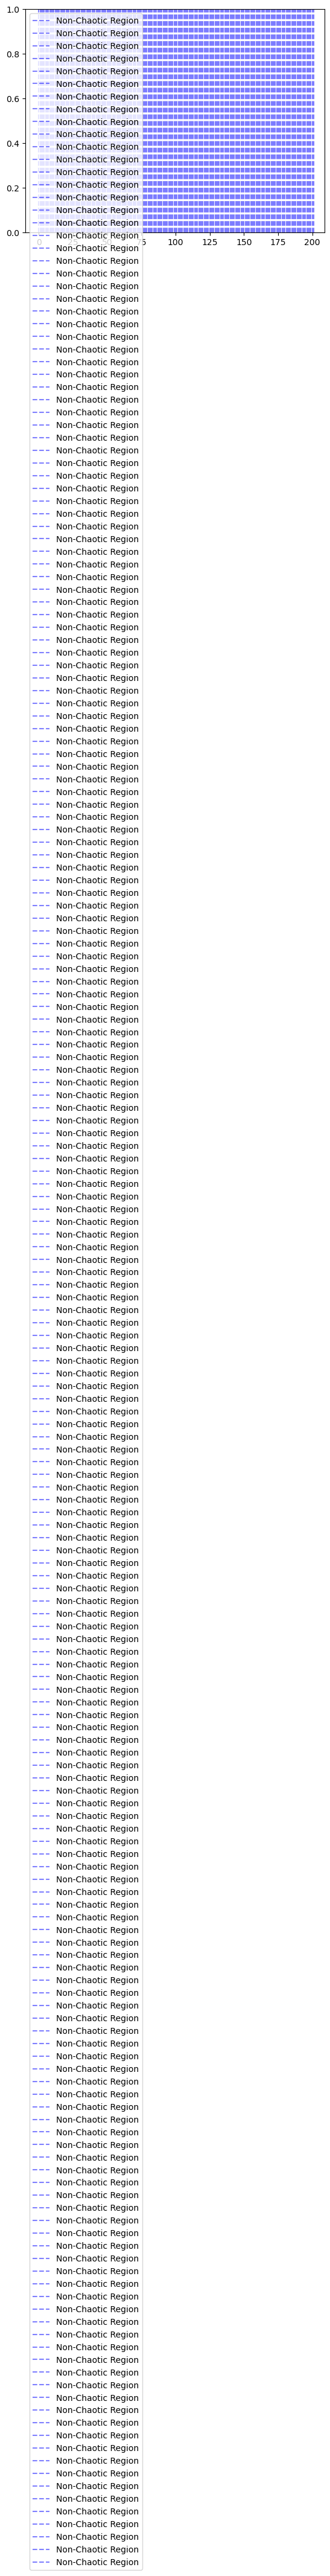

In [28]:
# Highlight chaotic regions if applicable
for region in chaotic_regions:
    plt.axvline(region, color='red', linestyle='--', alpha=0.5, label="Chaotic Region")

# Highlight non-chaotic regions
non_chaotic_regions = [i for i in range(len(prediction_errors)) if i not in chaotic_regions]
for region in non_chaotic_regions:
    plt.axvline(region, color='blue', linestyle='--', alpha=0.5, label="Non-Chaotic Region")

plt.legend()
plt.show()

# Saving the AI model

In [29]:
# Save the trained model to an HDF5 file
model_1.save("solar_data.h5")

C:\Users\muham\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
